# ch5.2 모듈 및 데이터 로딩

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv('galaxy.csv')

# 데이터(ebay ecommerce) 특성 확인하기

In [66]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [68]:
 data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


## 시각화

<AxesSubplot:xlabel='startprice', ylabel='Density'>

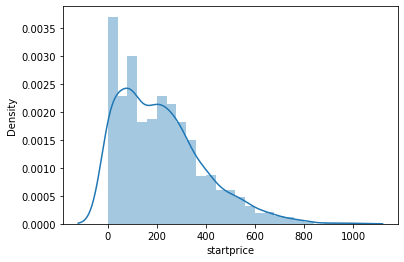

In [69]:
# distplot
sns.distplot(data['startprice'])

<AxesSubplot:xlabel='charCountDescription', ylabel='Density'>

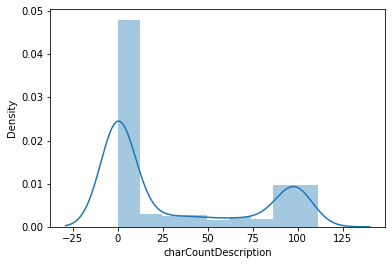

In [70]:
sns.distplot(data['charCountDescription'])

<AxesSubplot:xlabel='productline', ylabel='startprice'>

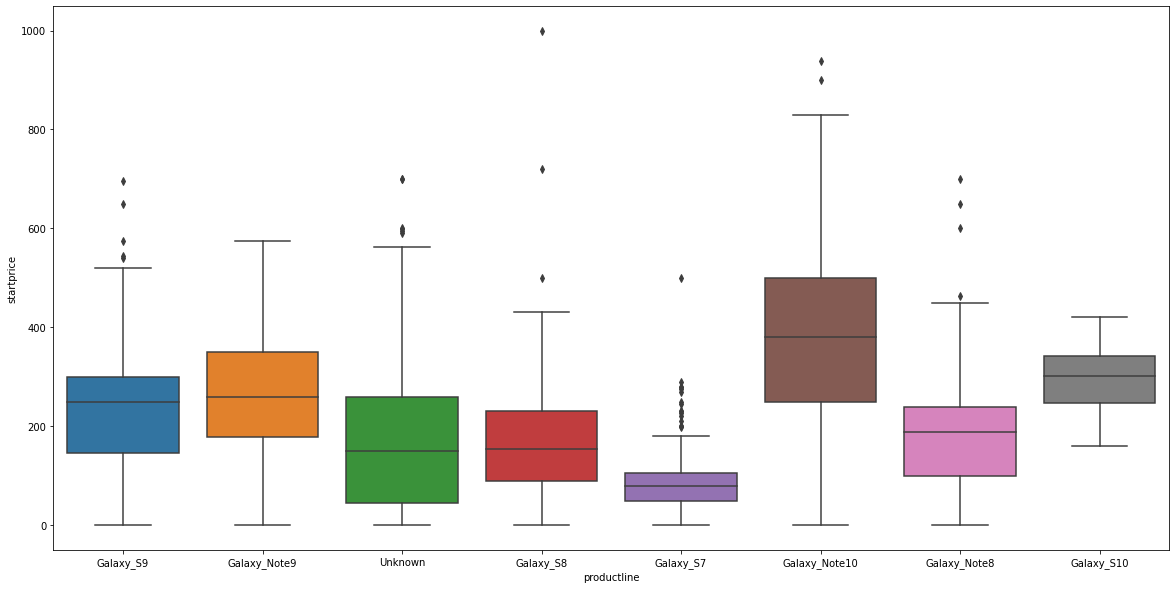

In [71]:
# boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='productline', y='startprice', data = data)

# ch5.3 Missing Value 확인 및 처리

In [72]:
data.isna().sum() / len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [73]:
data.tail(20)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1465,1,52.25,NaN,NaN,Unknown,contains description,0,0,0
1466,0,90.00,AT&T,Midnight Black,Galaxy_S7,contains description,0,0,0
1467,0,87.00,None,NaN,Unknown,contains description,0,0,0
1468,1,50.00,None,Midnight Black,Galaxy_S7,no description,100,12,1
1469,0,249.99,Sprint/T-Mobile,Space Gray,Galaxy_Note10,contains description,0,0,1
1470,0,219.99,None,Midnight Black,Galaxy_Note8,no description,100,4,0
1471,0,329.99,None,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,None,NaN,Galaxy_S7,no description,70,10,0
1473,0,250.00,None,Midnight Black,Galaxy_S9,no description,51,3,0
1474,0,129.99,None,Midnight Black,Galaxy_S7,no description,101,3,0


In [74]:
data = data.fillna('Unknown')

In [75]:
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,Unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,None,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,None,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1


In [76]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

# ch5.6 카테고리 변수 처리

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [78]:
data[['carrier', 'color', 'productline', 'noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [79]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [80]:
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [81]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [82]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

In [83]:
# Black 종류를 하나로 통합시켜줄 함수 작성 (A)
def black(x):
    if x == 'Midnight Black':
        return 'Black'
    elif x == 'Aura Black':
        return 'Black'
    elif x == 'Prism Black':
        return 'Black'
    else:
        return x    

In [84]:
# Black 종류를 하나로 통합시켜줄 함수 작성 (B)
def black(x):
    if (x == 'Midnight Black') | (x == 'Aura Black') | (x == 'Prism Black'):        
        return 'Black'
    else:
        return x    

In [85]:
data['color'].apply(lambda x: black(x))

0            White
1          Unknown
2          Unknown
3       Space Gray
4       Space Gray
           ...    
1480       Unknown
1481         Black
1482    Space Gray
1483         Black
1484         Black
Name: color, Length: 1485, dtype: object

In [86]:
# Black 종류를 하나로 통합시켜줄 함수 작성 (C)
def black(x):
    if x in ['Midnight Black','Aura Black','Prism Black']:        
        return 'Black'
    else:
        return x    

In [87]:
data['color'] = data['color'].apply(lambda x: black(x))

In [88]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [89]:
# one-hot encoding by pd.get_dummies
data = pd.get_dummies(data, columns = ['carrier', 'color', 'productline', 'noDescription'], drop_first=True)

In [90]:
data

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,...,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,235.00,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,199.99,100,2,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1,175.00,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,100.00,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1481,0,239.95,97,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1482,0,329.99,93,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1483,0,89.00,92,2,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# ch5.7 Decision Tree 모델 만들기

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# 독립변수, 종속변수 분리
X = data.drop('sold', axis = 1)
y = data['sold']

In [93]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
# Decision Tree 모델 생성
model = DecisionTreeClassifier(max_depth = 10)

In [103]:
# 모델 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

# 예측

In [97]:
pred = model.predict(X_test)

In [98]:
y_test

258     1
57      0
225     1
704     0
1096    0
       ..
44      0
1399    1
1035    0
259     1
532     1
Name: sold, Length: 297, dtype: int64

# 평가

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [100]:
accuracy_score(y_test, pred)

0.8047138047138047

# ch5.8 최적의 Max Depth 찾기 (파라미터 튜닝)

In [108]:
print('max_depth | accuracy')
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)    
    print(i, round(accuracy_score(y_test, pred), 4))

max_depth | accuracy
2 0.8182
3 0.8215
4 0.8215
5 0.8182
6 0.8081
7 0.8013
8 0.8114
9 0.7946
10 0.8114
11 0.7811
12 0.7879
13 0.7643
14 0.7576
15 0.7912
16 0.7677
17 0.7609
18 0.7677
19 0.7744
20 0.7609
21 0.7542
22 0.7643
23 0.7542
24 0.7576
25 0.7576
26 0.7475
27 0.7441
28 0.7407
29 0.7475
30 0.7407


#### 위의 For loop에 숫자를 2~30까지 집어넣었으므로, score에 들어있는 숫자는 i가 2,3,4,5,6,.. 일때 결과값. 
#### 즉, 최종적으로 얻은 score리스트에서 가장 큰 숫자가 index 1의 위치에 있다는것은 i가 3일 때를 의미함. 다시말해, i가 3일 때 가장 높은 스코어를 보여줌

# 최적의 Max Depth를 사용하여 다시 모델링하고 평가

In [109]:
model = DecisionTreeClassifier(max_depth = 3)

In [110]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [111]:
pred = model.predict(X_test)

In [112]:
accuracy_score(y_test, pred)

0.8215488215488216

In [113]:
confusion_matrix(y_test, pred)

array([[148,  13],
       [ 40,  96]])

# ch5.9 Tree Plot 만들기

In [117]:
from sklearn.tree import plot_tree

In [122]:
len(X_train.columns)

20

[Text(558.0, 475.65000000000003, 'X[0] <= 0.5\ngini = 0.497\nsamples = 1188\nvalue = [638, 550]'),
 Text(279.0, 339.75, 'X[1] <= 208.495\ngini = 0.357\nsamples = 659\nvalue = [506, 153]'),
 Text(139.5, 203.85000000000002, 'X[17] <= 0.5\ngini = 0.442\nsamples = 240\nvalue = [161, 79]'),
 Text(69.75, 67.94999999999999, 'gini = 0.43\nsamples = 230\nvalue = [158, 72]'),
 Text(209.25, 67.94999999999999, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(418.5, 203.85000000000002, 'X[3] <= 5.5\ngini = 0.291\nsamples = 419\nvalue = [345, 74]'),
 Text(348.75, 67.94999999999999, 'gini = 0.319\nsamples = 367\nvalue = [294, 73]'),
 Text(488.25, 67.94999999999999, 'gini = 0.038\nsamples = 52\nvalue = [51, 1]'),
 Text(837.0, 339.75, 'X[1] <= 142.475\ngini = 0.375\nsamples = 529\nvalue = [132, 397]'),
 Text(697.5, 203.85000000000002, 'X[1] <= 59.995\ngini = 0.216\nsamples = 332\nvalue = [41, 291]'),
 Text(627.75, 67.94999999999999, 'gini = 0.108\nsamples = 210\nvalue = [12, 198]'),
 Text(767.25, 67

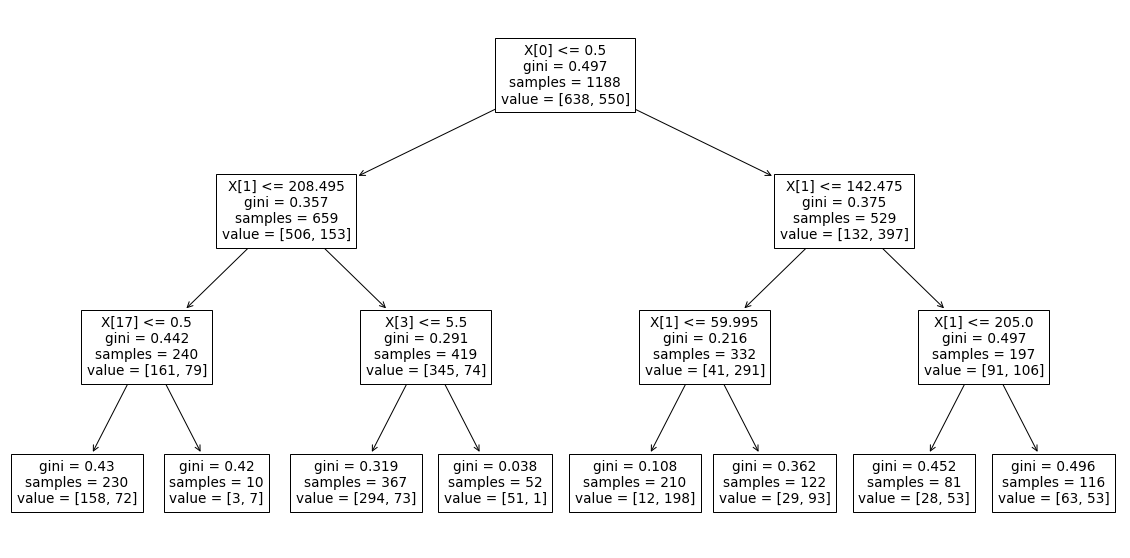

In [124]:
# 기본 plot
plt.figure(figsize=(20, 10))
plot_tree(model)

[Text(558.0, 475.65000000000003, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(279.0, 339.75, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(139.5, 203.85000000000002, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(697.5, 203.85000000000002, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'startprice <= 205.0\n0.497\n197\n[91, 106]'),
 Text(906.75, 67.94999999999999, '\n  (...)  \n'),
 Text(1046.25, 67.94999999999999, '\n  (...)  \n')]

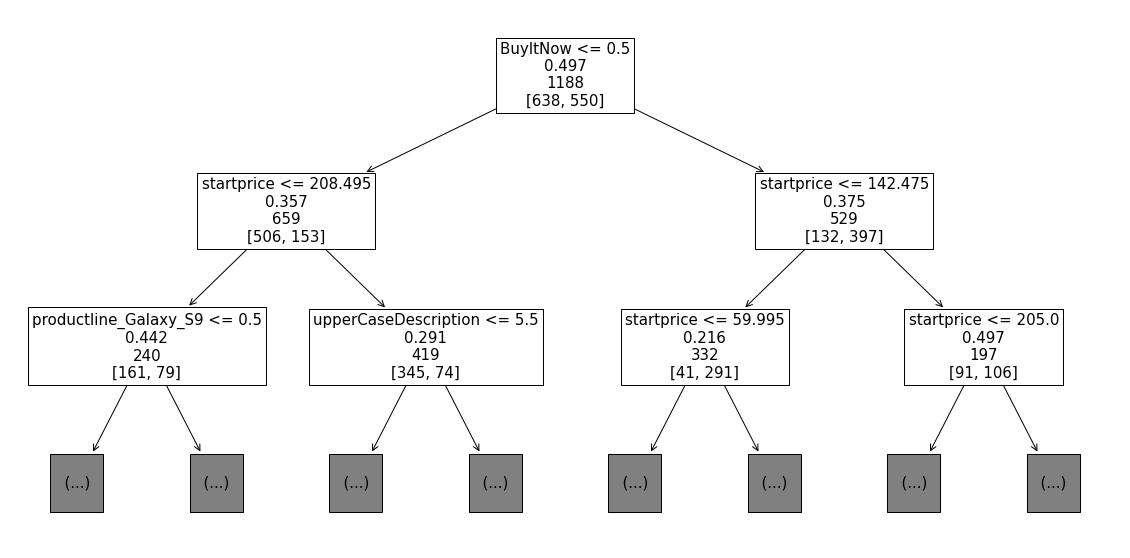

In [127]:
# 변수, 기준점 시각화
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label ="None", max_depth = 2)